In [1]:
import numpy as np
from atomdb import load
import matplotlib.pyplot as plt
#from atomdb import dens_func, d_dens_func, dd_dens_func, ked_func

relevant functions from AtomDB library: 

Task:
On AtomDB. For our collaboration with folks here, can you make a Jupyter notebook that gets the density (dens_func), gradient of the density (d_dens_func), Laplacian of the density (dd_dens_func), and kinetic-energy density (ked_func) for the atoms/ions? It's good to use our more accurate/comprehensive datasets, which are HCI and numerical HF, as I recall.

In [7]:
# Load Data From Server, Oxygen Atom in HF function Basis
HF = load(elem="O", charge=0, mult=3, dataset="numeric")

# arbitrary grid on which quantites are evaluated
rad_grid = np.linspace(0.0, 6.0, num=100)

# splines of the quantites are generated
dens_spline = HF.dens_func(spin="t", log=True)
d_dens_spline = HF.d_dens_func(spin="t")
dd_dens_spline = HF.dd_dens_func(spin="t")
#ked_spline = HF.ked_func(spin="t")

# quantities are projected onto grid
dens = dens_spline(rad_grid)
d_dens = d_dens_spline(rad_grid)
dd_dens = dd_dens_spline(rad_grid)
#ked = ked_spline(rad_grid)

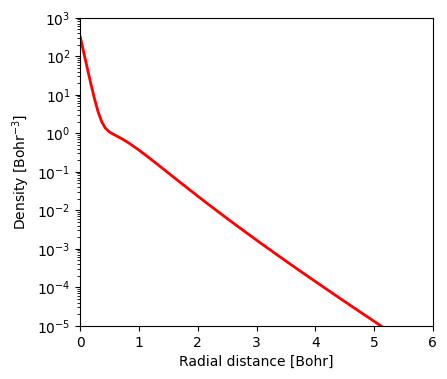

In [8]:
# plot Density and Kinetic Energy Density

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)

ax1.plot(rad_grid, dens, "-r", linewidth=2)
ax1.set(xlabel="Radial distance [Bohr]", ylabel="Density [Bohr$^{-3}$]")

ax1.set_yscale("log")
ax1.set_ylim(top=1000, bottom=0.00001)
ax1.set_xlim(left=0.0, right=6)

# ax2.plot(rad_grid, ked, "-b", linewidth=2)
# ax2.set(xlabel="Radial distance [Bohr]", ylabel=r"KED E$_{h}$ Bohr$^{-3}$")

plt.show()

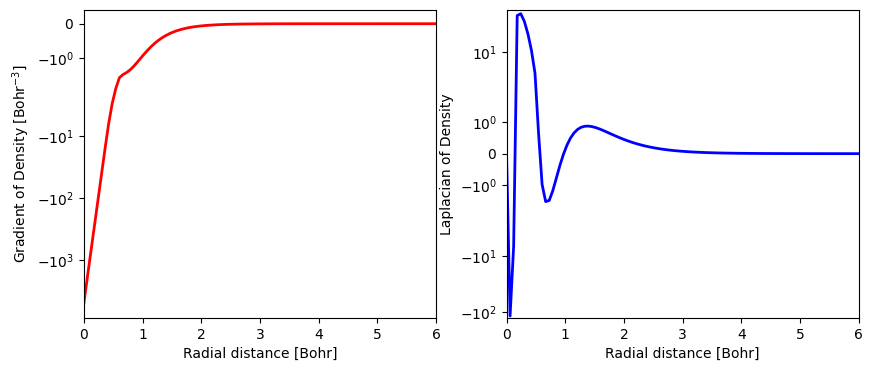

In [10]:
# plot Gradient of Density and Lagrangian of Density

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(rad_grid, d_dens, "-r", linewidth=2)
ax1.set(xlabel="Radial distance [Bohr]", ylabel="Gradient of Density [Bohr$^{-3}$]")

ax1.set_yscale("symlog")
ax1.set_xlim(left=0.0, right=6)

ax2.plot(rad_grid, dd_dens, "-b", linewidth=2)
ax2.set(xlabel="Radial distance [Bohr]", ylabel="Laplacian of Density")

ax2.set_xlim(left=0.0, right=6)
ax2.set_yscale("symlog")

plt.show()